In [3704]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from pylab import *
import os
import pandas as pd
import gc
from scipy.signal import blackman
import csv
from scipy.io import wavfile
import wave
from struct import pack
import plotly,plotly as py
from dtw import dtw
from numpy.linalg import norm
from datetime import datetime
from datetime import timedelta
import ipywidgets as widgets
#from numba import vectorize

gc.enable()

data_path = "data/"
date = "20181205"
stereo_path = "stereo/"
vector_path = "vector/"
visual_path = "visual/"

video_start = '20191030'#'20191030'#'20191030' #YYYYMMDD
video_end = '20191030'#'20191030'#'20191108' #YYYYMMDD
temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

directory_list = ['cloth','metal','paper','plastic','porcelain','wood']

for mat in directory_list:
    if not os.path.exists(visual_path+mat):
        os.makedirs(visual_path+mat)
        
#material = "porcelain/"

2019/10/30
2019/10/30


In [3705]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

%config IPCompleter.greedy=True

In [3926]:
session_list = []
with open('data/capture_time.csv') as csvfile: #read session data from capture_time.csv
    readCSV = csv.reader(csvfile, delimiter='-')
    line_no = 0
    print "The data sessions taken during the start and end dates"
    for row in readCSV:
        if row[0] != '' and row[1] != '': #Check if both start and end times of each row exists
            starttime = datetime.strptime(row[0],'%Y/%m/%d %H:%M:%S.%f')
            endtime = datetime.strptime(row[1],'%Y/%m/%d %H:%M:%S.%f')
            #print starttime.date()
            if starttime.date() >= video_startdatte.date() and endtime.date() <= video_enddate.date(): #Check if sessions available which matches the startdate and enddate
                line_no = line_no + 1
                print "(", line_no, ")", "\t", starttime, "-", endtime
                session_list.append(row[0] + "-" + row[1])

print "Please input the session number. Confirm the start and end times using the video."
session = raw_input("Session ") 
print "You have chosen the session ", session

The data sessions taken during the start and end dates
( 1 ) 	2019-10-30 12:25:16.960000 - 2019-10-30 12:33:56.079000
( 2 ) 	2019-10-30 12:40:08.725000 - 2019-10-30 12:45:44.625000
( 3 ) 	2019-10-30 12:51:30.687000 - 2019-10-30 12:57:29.762000
( 4 ) 	2019-10-30 13:01:51.096000 - 2019-10-30 13:07:45.113000
( 5 ) 	2019-10-30 13:31:05.620000 - 2019-10-30 13:37:04.855000
Please input the session number. Confirm the start and end times using the video.
Session 2
You have chosen the session  2


In [3927]:
experiment_number = raw_input("Experiment number: ")

Experiment number: 13


In [3928]:
experiment_log = raw_input("Summary of the experiment: ")

Summary of the experiment: 


In [3929]:
session_starttime = datetime.strptime(session_list[int(session)-1][0:23],'%Y/%m/%d %H:%M:%S.%f')
session_endtime = datetime.strptime(session_list[int(session)-1][24:47],'%Y/%m/%d %H:%M:%S.%f')
print "Start and end times for your selected session are as follows."
print "Start time = ",session_starttime
print "End time = ",session_endtime

Start and end times for your selected session are as follows.
Start time =  2019-10-30 12:40:08.725000
End time =  2019-10-30 12:45:44.625000


In [3930]:
session = [session]

In [3931]:
session

['2']

# Creating folder structure

In [3932]:
import os

if not os.path.exists("processed"):
    os.mkdir("processed",0777)
if not os.path.exists("processed/experiment_" + experiment_number ):
    os.mkdir("processed/experiment_" + experiment_number,0777)
    
for sess in session:
    print sess
    
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) ):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess),0777)
        
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/preprocess" ):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess)+ "/preprocess" ,0777)
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/preprocess/visual" ):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess)+ "/preprocess/visual" ,0777)
        
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "training_phase"):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "training_phase",0777) 
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "training_phase/visual"):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "training_phase/visual",0777) 
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "training_phase/mfccs"):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "training_phase/mfccs",0777) 
        
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "testing_phase"):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "testing_phase",0777)
    if not os.path.exists("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "testing_phase/visual"):
        os.mkdir("processed/experiment_" + experiment_number + "/" + str(sess) + "/" + "testing_phase/visual",0777)

2


In [3933]:
root = "processed/experiment_" + experiment_number + "/" + str(sess) 
training_root = root + "/training_phase/"
testing_root = root + "/testing_phase/"
preprocess_root = root + "/preprocess/"

# Read xml file and make labels

In [3934]:
import xml.etree.ElementTree as et 
import dateutil.parser

xtree = et.parse("labels/env_1/user_1.xml")
xroot = xtree.getroot()

In [3935]:
df_cols = ["label", "label_start", "label_end"]
rows = []

for node in xroot: 
    label = node.find("eventtype")
    label_start = node.find("start")
    label_end = node.find("end")


    label = label.text if label is not None else None
    label_start = label_start.text if label is not None else None
    label_end = label_end.text if label is not None else None
    
    label_start = dateutil.parser.parse(label_start) if label is not None else None
    label_end = dateutil.parser.parse(label_end) if label is not None else None

    rows.append([label, label_start, label_end])
    #rows.append({"eventtype": label, "start": label_start, "end": label_end})
del(rows[0])

In [3936]:
label_list = pd.DataFrame(rows, columns = df_cols)

In [3937]:
label_list

,label,label_start,label_end
0,bedroom,2019-10-30 12:25:42.271,2019-10-30 12:26:58.439
1,bathroom,2019-10-30 12:27:02.538,2019-10-30 12:28:29.636
2,toilet,2019-10-30 12:28:35.443,2019-10-30 12:29:38.632
3,dining,2019-10-30 12:29:53.660,2019-10-30 12:30:51.726
4,kitchen,2019-10-30 12:30:55.825,2019-10-30 12:31:56.623
5,office,2019-10-30 12:32:01.746,2019-10-30 12:33:50.705
6,bedroom,2019-10-30 12:40:14.621,2019-10-30 12:41:20.543
7,kitchen,2019-10-30 12:41:24.983,2019-10-30 12:42:01.189
8,office,2019-10-30 12:42:03.921,2019-10-30 12:42:57.888
9,dining,2019-10-30 12:43:02.328,2019-10-30 12:43:48.439


In [3938]:
label_list["label_start"] = pd.to_datetime(label_list["label_start"],format = '%Y-%m-%d %H:%M:%S.%f')
label_list["label_end"] = pd.to_datetime(label_list["label_end"],format = '%Y-%m-%d %H:%M:%S.%f')

In [3939]:
label_list

,label,label_start,label_end
0,bedroom,2019-10-30 12:25:42.271,2019-10-30 12:26:58.439
1,bathroom,2019-10-30 12:27:02.538,2019-10-30 12:28:29.636
2,toilet,2019-10-30 12:28:35.443,2019-10-30 12:29:38.632
3,dining,2019-10-30 12:29:53.660,2019-10-30 12:30:51.726
4,kitchen,2019-10-30 12:30:55.825,2019-10-30 12:31:56.623
5,office,2019-10-30 12:32:01.746,2019-10-30 12:33:50.705
6,bedroom,2019-10-30 12:40:14.621,2019-10-30 12:41:20.543
7,kitchen,2019-10-30 12:41:24.983,2019-10-30 12:42:01.189
8,office,2019-10-30 12:42:03.921,2019-10-30 12:42:57.888
9,dining,2019-10-30 12:43:02.328,2019-10-30 12:43:48.439


# Reading the sweep timestamps of the current session

In [3940]:
data_date = str(session_starttime.date())
data_date = data_date[0:4]+data_date[5:7]+data_date[8:10]
sweep_times = data_date

In [3941]:
sweep_times

'20191030'

In [3942]:
sweep_list=[]
if video_start!=video_end:
    for sweeps in os.listdir(data_path + "/" + video_start): #read data files from data folder
        if ".txt" in sweeps:
            sweep_list.append(sweeps)

    for sweeps in os.listdir(data_path + "/" + video_end): #read data files from data folder
        if ".txt" in sweeps:
            sweep_list.append(sweeps)
            
else:
    for sweeps in os.listdir(data_path + "/" + video_start): #read data files from data folder
        if ".txt" in sweeps:
            sweep_list.append(sweeps)
        
sweep_list

['20191030_130151.txt',
 '20191030_125130.txt',
 '20191030_124008.txt',
 '20191030_133105.txt',
 '20191030_122516.txt']

In [3943]:
rmv = []
for sweep in sweep_list:
    #print datetime.strptime(sweep[0:15],'%Y%m%d_%H%M%S')
    if datetime.strptime(sweep[0:15],'%Y%m%d_%H%M%S')<datetime.strptime(session_starttime.strftime('%Y%m%d_%H%M%S'),'%Y%m%d_%H%M%S') and datetime.strptime(sweep[0:15],'%Y%m%d_%H%M%S')<datetime.strptime(session_endtime.strftime('%Y%m%d_%H%M%S'),'%Y%m%d_%H%M%S'): 
        print datetime.strptime(session_starttime.strftime('%Y%m%d_%H%M%S'),'%Y%m%d_%H%M%S'), "-", datetime.strptime(session_endtime.strftime('%Y%m%d_%H%M%S'),'%Y%m%d_%H%M%S')
        print datetime.strptime(sweep[0:15],'%Y%m%d_%H%M%S')
        print "*********************"
        rmv.append(sweep)
        
    if datetime.strptime(sweep[0:15],'%Y%m%d_%H%M%S')>datetime.strptime(session_starttime.strftime('%Y%m%d_%H%M%S'),'%Y%m%d_%H%M%S') and datetime.strptime(sweep[0:15],'%Y%m%d_%H%M%S')>datetime.strptime(session_endtime.strftime('%Y%m%d_%H%M%S'),'%Y%m%d_%H%M%S'):
        print "hit"
        rmv.append(sweep)

hit
hit
hit
2019-10-30 12:40:08 - 2019-10-30 12:45:44
2019-10-30 12:25:16
*********************


In [3944]:
for remove in rmv:
    print remove
    sweep_list.remove(remove)
    
print rmv

20191030_130151.txt
20191030_125130.txt
20191030_133105.txt
20191030_122516.txt
['20191030_130151.txt', '20191030_125130.txt', '20191030_133105.txt', '20191030_122516.txt']


In [3945]:
sweep_list

['20191030_124008.txt']

In [3946]:
sweep_list

['20191030_124008.txt']

In [3947]:
sweep_timestamps = []
sweep_filenames = []
file_content=[]

if video_start != video_end:
    for d in [video_start, video_end]:
        for files in sweep_list:
            #print files
            if os.path.isfile( data_path  + d + "/" + files):
                print files
                open_file = open(data_path + "/" + d + "/" + files, "r") 
                file_cont = open_file.readlines() 
                #print file_content
                file_cont = [x.strip() for x in file_cont] 
                file_content.extend(file_cont)
                #print datetime.strptime(file_content[6:29],'%Y/%m/%d %H:%M:%S.%f')
                #for lines in file_content:
                 #   sweep_timestamps.append(datetime.strptime(file_content[6:29],'%Y/%m/%d %H:%M:%S.%f'))
else:
    for files in sweep_list:
            #print files
            if os.path.isfile( data_path  + video_start + "/" + files):
                print files
                open_file = open(data_path + "/" + video_start + "/" + files, "r") 
                file_cont = open_file.readlines() 
                #print file_content
                file_cont = [x.strip() for x in file_cont] 
                file_content.extend(file_cont)
                #print datetime.strptime(file_content[6:29],'%Y/%m/%d %H:%M:%S.%f')
                #for lines in file_content:
                 #   sweep_timestamps.append(datetime.strptime(file_content[6:29],'%Y/%m/%d %H:%M:%S.%f'))


for items in file_content:
    print items
    sweep_filenames.append(datetime.strptime(items[6:29],'%Y/%m/%d %H:%M:%S.%f').strftime('%Y%m%d_%H%M%S_%f')[:-3]+".wav")

20191030_124008.txt
sweep,2019/10/30 12:40:08.884
sweep,2019/10/30 12:40:17.025
sweep,2019/10/30 12:40:25.690
sweep,2019/10/30 12:40:34.068
sweep,2019/10/30 12:40:42.197
sweep,2019/10/30 12:40:50.513
sweep,2019/10/30 12:40:59.055
sweep,2019/10/30 12:41:07.899
sweep,2019/10/30 12:41:16.084
sweep,2019/10/30 12:41:24.899
sweep,2019/10/30 12:41:33.532
sweep,2019/10/30 12:41:41.906
sweep,2019/10/30 12:41:50.598
sweep,2019/10/30 12:41:59.365
sweep,2019/10/30 12:42:07.581
sweep,2019/10/30 12:42:16.842
sweep,2019/10/30 12:42:25.506
sweep,2019/10/30 12:42:33.753
sweep,2019/10/30 12:42:42.361
sweep,2019/10/30 12:42:50.904
sweep,2019/10/30 12:42:59.587
sweep,2019/10/30 12:43:07.735
sweep,2019/10/30 12:43:16.500
sweep,2019/10/30 12:43:25.128
sweep,2019/10/30 12:43:33.500
sweep,2019/10/30 12:43:42.184
sweep,2019/10/30 12:43:50.725
sweep,2019/10/30 12:43:59.301
sweep,2019/10/30 12:44:08.168
sweep,2019/10/30 12:44:16.632
sweep,2019/10/30 12:44:25.145
sweep,2019/10/30 12:44:33.418
sweep,2019/10/30 12:

In [3948]:
sweep_filenames

['20191030_124008_884.wav',
 '20191030_124017_025.wav',
 '20191030_124025_690.wav',
 '20191030_124034_068.wav',
 '20191030_124042_197.wav',
 '20191030_124050_513.wav',
 '20191030_124059_055.wav',
 '20191030_124107_899.wav',
 '20191030_124116_084.wav',
 '20191030_124124_899.wav',
 '20191030_124133_532.wav',
 '20191030_124141_906.wav',
 '20191030_124150_598.wav',
 '20191030_124159_365.wav',
 '20191030_124207_581.wav',
 '20191030_124216_842.wav',
 '20191030_124225_506.wav',
 '20191030_124233_753.wav',
 '20191030_124242_361.wav',
 '20191030_124250_904.wav',
 '20191030_124259_587.wav',
 '20191030_124307_735.wav',
 '20191030_124316_500.wav',
 '20191030_124325_128.wav',
 '20191030_124333_500.wav',
 '20191030_124342_184.wav',
 '20191030_124350_725.wav',
 '20191030_124359_301.wav',
 '20191030_124408_168.wav',
 '20191030_124416_632.wav',
 '20191030_124425_145.wav',
 '20191030_124433_418.wav',
 '20191030_124441_764.wav',
 '20191030_124450_491.wav',
 '20191030_124458_845.wav',
 '20191030_124507_06

datetime.strptime(file_content[1][6:29],'%Y/%m/%d %H:%M:%S.%f').strftime('%Y%m%d_%H%M%S_%f')[:-3]

In [3949]:
hour = datetime.strptime(items[6:29],'%Y/%m/%d %H:%M:%S.%f')

sweep_filenames[1][9:11]

# Reading audio files

In [3950]:
def visualize_power_spec(signal,low,high,overlap):
    Fs = 44100#5000*2.#10000.
    NFFT = 1024#1024#min(4096, len(data))#32768
    noverlap = NFFT*overlap #NFFT*0.96#NFFT /2 #fft size
    pad_to = NFFT * 16
    dynamicRange = 20#30 #change this to change the color scale. 
    #vmin = 20*np.log10(np.max(filtered_sig_r)) - dynamicRange

    window=blackman(NFFT)
    #window=signal.nuttall(NFFT)
    #window=np.hamming(NFFT)
    #window = np.hanning(NFFT)

    cmap = plt.get_cmap('magma')

    Pxx, freqs, times, cax = plt.specgram(signal, NFFT=NFFT, window=window, Fs=Fs, noverlap=noverlap, mode='magnitude', scale='dB', pad_to=pad_to, cmap=cmap)


    #plt.figure(figsize=[30,20])
    axes_spec = plt.gca()
    axes_spec.set_xlim([0, len(signal)/Fs])
    axes_spec.set_ylim([low, high])

    print Pxx.shape

    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    #plt.pcolormesh(t, f, Sxx)
    #plt.colorbar(cax, label='(dB)').ax.yaxis.set_label_position('left')

    plt.tight_layout()
    plt.show()
    #plt.savefig("test" + '.png')

In [3951]:
from tqdm import tqdm
sweep_signals = []
labeled_sweep_files = []

if video_start!=video_end:
    for d in [video_start,video_end]:   
        for file_names in tqdm(sweep_filenames): 
            if os.path.isfile( data_path + d + "/" + file_names[9:11] + "/" + file_names):
                candid_file = datetime.strptime(file_names[:-4], '%Y%m%d_%H%M%S_%f')
                for indx,rows in label_list.iterrows():
                    if candid_file >= rows.label_start and candid_file <= rows.label_end:
                    
                        labeled_sweep_files.append(file_names)
                        sample_rate, signal = scipy.io.wavfile.read(data_path + d + "/" + file_names[9:11] + "/" + file_names)
                        sweep_signals.append(signal)
                        
else:
    for file_names in tqdm(sweep_filenames): 
        if os.path.isfile( data_path + video_start + "/" + file_names[9:11] + "/" + file_names):
            candid_file = datetime.strptime(file_names[:-4], '%Y%m%d_%H%M%S_%f')
            for indx,rows in label_list.iterrows():
                if candid_file >= rows.label_start and candid_file <= rows.label_end:
                
                    labeled_sweep_files.append(file_names)
                    sample_rate, signal = scipy.io.wavfile.read(data_path + video_start + "/" + file_names[9:11] + "/" + file_names)
                    sweep_signals.append(signal)





  0%|          | 0/39 [00:00<?, ?it/s]



  3%|▎         | 1/39 [00:00<00:06,  5.90it/s]



  5%|▌         | 2/39 [00:00<00:06,  6.01it/s]



  8%|▊         | 3/39 [00:00<00:06,  5.84it/s]



 10%|█         | 4/39 [00:00<00:05,  5.87it/s]



 13%|█▎        | 5/39 [00:00<00:05,  5.96it/s]



 15%|█▌        | 6/39 [00:01<00:05,  5.92it/s]



 18%|█▊        | 7/39 [00:01<00:05,  5.87it/s]



 21%|██        | 8/39 [00:01<00:05,  5.97it/s]



 23%|██▎       | 9/39 [00:01<00:05,  5.99it/s]



 26%|██▌       | 10/39 [00:01<00:04,  6.15it/s]



 28%|██▊       | 11/39 [00:01<00:04,  6.10it/s]



 31%|███       | 12/39 [00:02<00:05,  5.26it/s]



 33%|███▎      | 13/39 [00:02<00:04,  5.42it/s]



 36%|███▌      | 14/39 [00:02<00:04,  5.51it/s]



 38%|███▊      | 15/39 [00:02<00:04,  5.58it/s]



 41%|████      | 16/39 [00:02<00:04,  5.70it/s]



 44%|████▎     | 17/39 [00:03<00:04,  5.24it/s]



 46%|████▌     | 18/39 [00:03<00:03,  5.28it/s]



 49%|████▊     | 19/39 [00:03<00:03,  5.50it/

In [3952]:
rows

label                              living
label_start    2019-12-06 15:29:46.039000
label_end      2019-12-06 15:36:21.176000
Name: 88, dtype: object

In [3953]:
label_list

,label,label_start,label_end
0,bedroom,2019-10-30 12:25:42.271,2019-10-30 12:26:58.439
1,bathroom,2019-10-30 12:27:02.538,2019-10-30 12:28:29.636
2,toilet,2019-10-30 12:28:35.443,2019-10-30 12:29:38.632
3,dining,2019-10-30 12:29:53.660,2019-10-30 12:30:51.726
4,kitchen,2019-10-30 12:30:55.825,2019-10-30 12:31:56.623
5,office,2019-10-30 12:32:01.746,2019-10-30 12:33:50.705
6,bedroom,2019-10-30 12:40:14.621,2019-10-30 12:41:20.543
7,kitchen,2019-10-30 12:41:24.983,2019-10-30 12:42:01.189
8,office,2019-10-30 12:42:03.921,2019-10-30 12:42:57.888
9,dining,2019-10-30 12:43:02.328,2019-10-30 12:43:48.439


# Bandpass filter (remove the lower and higher frequencies)

In [3954]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=9):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3955]:
filtered_sweep_signals = []
for sig in sweep_signals:
    filtered_sweep_signals.append(butter_bandpass_filter(sig,17500,20500,44100))

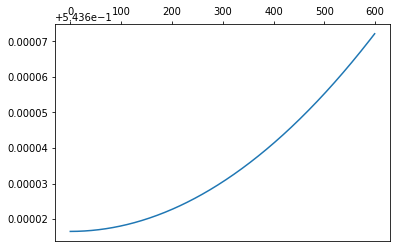

In [3956]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 1200

yf = scipy.fftpack.fft(filtered_sweep_signals[0])

fig, ax = plt.subplots()
ax.plot( np.abs(yf[:N//2]))
plt.show()

# Generating a sweep signal

In [3957]:
from scipy.signal import chirp

In [3958]:
t = np.linspace(0, 1, 44100)
generated_sweep = chirp(t=t, f0=18000, t1=1, f1=20000, method='linear')

In [3959]:
#plt.figure(figsize = (20,5))
#plt.xlim(0,len(sweep_signal))
#plt.plot(generated_sweep)
#plt.show()

In [3960]:
#visualize_power_spec(generated_sweep,17500,20500,0.8)

# Deconvolution

ydc, remainder = scipy.signal.deconvolve(conv[0], generated_sweep[::-1])

plt.figure(figsize = (20,5))
#plt.xlim(0,len(sweep_signal))
plt.plot(remainder)
plt.show()

visualize_power_spec(ydc,0,22000,0.8)

# Convolution

In [3961]:
conv = []
#for j in range(0,len(sweep_signals)):
for itr in filtered_sweep_signals:
    conv.append(scipy.signal.fftconvolve(itr, generated_sweep[::-1]))

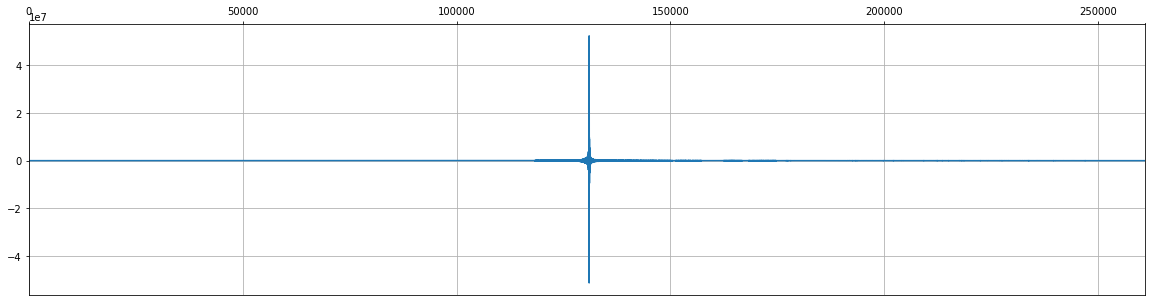

In [3962]:
plt.figure(figsize = (20,5))
#plt.xlim(0,len(sweep_signal))
plt.xlim(0,len(conv[0]))
plt.plot(conv[0])
plt.grid(True)
plt.savefig(preprocess_root + "visual/long_ir.png")
plt.show()

In [3963]:
len(conv)

34

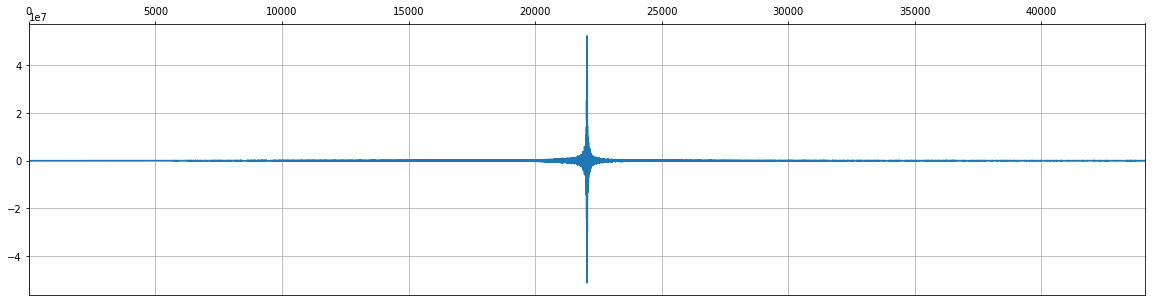

In [3964]:
plt.figure(figsize = (20,5))
#plt.xlim(0,len(sweep_signal))
plt.xlim(0,len(conv[0][conv[0].argmax()-22050:conv[0].argmax()+22050]))
plt.plot(conv[0][conv[0].argmax()-22050:conv[0].argmax()+22050])
plt.grid(True)
plt.savefig(preprocess_root + "visual/short_ir.png")
plt.show()

In [3965]:
len(conv[0])

260931

In [3966]:
len(conv)

34

In [3967]:
def convolution(signal):
    conv_signal = scipy.signal.fftconvolve(signal, generated_sweep[::-1])

In [3968]:
imp_res=[]
for audio in range(0,len(filtered_sweep_signals)):
    imp_res.append(convolution(filtered_sweep_signals[audio]))
    

# Calculate correlation and cut the required part of the signal (also perform synchronized average if necessary)

In [3969]:
from scipy.stats import pearsonr

#searching for the max correlation
cut = []
max_cor_pos = []

for i in range(0,len(conv)):
    cut.append(conv[i][conv[i].argmax()-1000:conv[i].argmax()+1000])
#synchronized average
#for i in range(1,len(cut)):    
#    correlation = []
#    for j in range(0,500):
#        r,p = pearsonr(cut[0][0:1500+j],cut[i][500-j:2000])
#        correlation.append(r)
#    max_cor_pos.append(np.where(correlation==np.nanmax(np.asarray(correlation))))
    #print np.where(correlation==np.nanmax(np.asarray(correlation)))

In [3970]:
sync_add = []
sync_avg = []

for x in range(0,len(max_cor_pos)):
    sync_sub = []
    for y in range(0,2000-(500-int(max_cor_pos[0][0]))):
        sync_sub.append(float(cut[0][y:y+1])+int(cut[x+1][2000-1500-int(max_cor_pos[0][0])+y:2000-1500-int(max_cor_pos[0][0])+y+1]))
    sync_add.append(sync_sub)
    #print "done"

In [3971]:
sync_avg = np.asarray(sync_add).sum(axis=0)/float(len(max_cor_pos)+1)

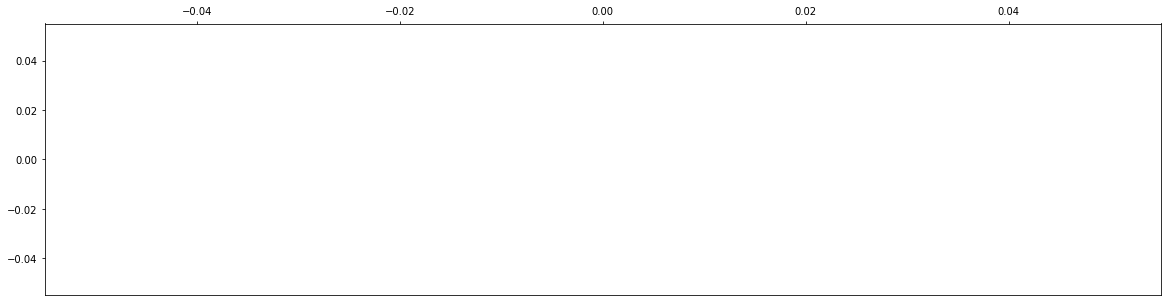

In [3972]:
plt.figure(figsize = (20,5))
plt.plot(sync_avg)
#plt.savefig(visual_path + material + "imp_res.png")
plt.show()

In [3973]:
len(sync_avg)

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
len(conv[0])

# Calculating MFCC

In [ ]:
def calc_mfcc(sample_rate,signal): 
    ##Pre-emphasis##
    pre_emphasis = 0.97
    emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])



    ##Framing##
    frame_size = 0.001#0.01#0.01#0.025#
    frame_stride = 0.001#0.00155#0.00144#overlapping=frame_size-frame_stride
    #overlapping=float(frame_size-frame_stride)/frame_size
    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))
    print "num_frames=",num_frames
    pad_signal_length = num_frames * frame_step + frame_length
    z = numpy.zeros((pad_signal_length - signal_length))
    pad_signal = numpy.append(emphasized_signal, z)
    indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(numpy.int32, copy=False)]



    ##Window##
    frames *= numpy.hamming(frame_length)
    #frames *= blackman(frame_length)



    ##Fourier-transform and power spectrum##
    NFFT = 1024
    mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT)) #magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) #power spectrum
    pow_frames_new = pow_frames[:,400:500]
    print "pow_frames=",len(pow_frames)
    print "pow_frames=",pow_frames.shape
    print "pow_frames=",type(pow_frames)



    ##Filter banks##
    nfilt = 40
    low_freq_mel = (2595 * numpy.log10(1 + (18000) / 700)) #thilina was 18000 instead of 20
    high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700)) #convert Hz to Mel
    
    mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2) #equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1)) #converts Mel to Hz
    bin = numpy.floor((NFFT +1) * hz_points / sample_rate)
    print "hz_points=",hz_points
    fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 +1))))
    #fbank = numpy.zeros((nfilt,100))
    print "fbank=",fbank.shape
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1]) #left
        f_m = int(bin[m]) #center
        f_m_plus = int(bin[m + 1]) #right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    print "fbank=",fbank.shape
    filter_banks = numpy.dot(pow_frames, fbank.T)
    #fbank_new = fbank[:,0:100]
    #filter_banks = numpy.dot(pow_frames_new, fbank_new.T)
    filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks) #numerical stability
    filter_banks = 20 * numpy.log10(filter_banks) #dB



    ##Mel-Frequency Cepstral Coefficients (MFCCs)##
    num_ceps = 12
    mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] #keep 2-13
    cep_lifter = 22
    (nframes, ncoeff) = mfcc.shape
    n = numpy.arange(ncoeff)
    lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
    mfcc *= lift



    ##Mean normalization##
    filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
    mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
    
    return mfcc,mag_frames,pow_frames

In [ ]:
def plot_mfcc_data(data, vmin, vmax, name):
    print vmin
    print vmax
    cmap=plt.get_cmap('jet')
    plt.figure(figsize = (20,5))
    plt.imshow(data.T, cmap=cm.jet, interpolation='nearest', vmin=vmin, vmax=vmax, origin='lower', extent=[0,len(mfcc),0,13], aspect='auto')
    plt.tight_layout()
    plt.colorbar()
    #plt.savefig(visual_path + material + "/" + name + ".png")
    plt.show()

In [3974]:
len(cut)

34

# Calculating MFCC

In [3975]:
feat_list = []
mfcc_list = []
for cuts in cut:
    mfcc,mag_frames,pow_frames=calc_mfcc(sample_rate,cuts)
    mfcc_list.append(mfcc)
    feat_list.append(mfcc.T.mean(axis=0))

num_frames= 45
pow_frames= 45
pow_frames= (45, 513)
pow_frames= <type 'numpy.ndarray'>
hz_points= [17500.         17592.40541078 17685.27998419 17778.62610228
 17872.44615917 17966.74256118 18061.5177268  18156.77408681
 18252.51408436 18348.74017498 18445.45482667 18542.66051995
 18640.35974796 18738.55501648 18837.24884402 18936.44376187
 19036.14231418 19136.34705801 19237.0605634  19338.28541346
 19440.02420439 19542.27954558 19645.05405967 19748.35038262
 19852.17116376 19956.51906589 20061.39676532 20166.80695193
 20272.75232929 20379.23561468 20486.25953918 20593.82684773
 20701.9402992  20810.6026665  20919.81673658 21029.58531056
 21139.91120378 21250.79724588 21362.24628084 21474.26116712
 21586.84477766 21700.        ]
fbank= (40, 513)
fbank= (40, 513)
num_frames= 45
pow_frames= 45
pow_frames= (45, 513)
pow_frames= <type 'numpy.ndarray'>
hz_points= [17500.         17592.40541078 17685.27998419 17778.62610228
 17872.44615917 17966.74256118 18061.5177268  18156.77408681
 18252

num_frames= 45
pow_frames= 45
pow_frames= (45, 513)
pow_frames= <type 'numpy.ndarray'>
hz_points= [17500.         17592.40541078 17685.27998419 17778.62610228
 17872.44615917 17966.74256118 18061.5177268  18156.77408681
 18252.51408436 18348.74017498 18445.45482667 18542.66051995
 18640.35974796 18738.55501648 18837.24884402 18936.44376187
 19036.14231418 19136.34705801 19237.0605634  19338.28541346
 19440.02420439 19542.27954558 19645.05405967 19748.35038262
 19852.17116376 19956.51906589 20061.39676532 20166.80695193
 20272.75232929 20379.23561468 20486.25953918 20593.82684773
 20701.9402992  20810.6026665  20919.81673658 21029.58531056
 21139.91120378 21250.79724588 21362.24628084 21474.26116712
 21586.84477766 21700.        ]
fbank= (40, 513)
fbank= (40, 513)
num_frames= 45
pow_frames= 45
pow_frames= (45, 513)
pow_frames= <type 'numpy.ndarray'>
hz_points= [17500.         17592.40541078 17685.27998419 17778.62610228
 17872.44615917 17966.74256118 18061.5177268  18156.77408681
 18252

# Make sweep timestamps and labeled data

In [3976]:
features = pd.DataFrame(feat_list)

In [3977]:
timestamps = []
for stmps in labeled_sweep_files:
    #print stmps[:-4]
    timestamps.append(datetime.strptime(stmps[:-4], '%Y%m%d_%H%M%S_%f'))

In [3978]:
features.index = timestamps

In [3979]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
2019-10-30 12:40:17.025,5.846054,-0.255357,-1.012718,0.236906,-0.564862,1.216084,8.084987,-0.690359,1.501002,6.403151,...,-4.573820,-2.094509,7.528715,-7.189748,-1.760392,-4.487275,-10.000501,-6.252496,-8.440113,-4.438611
2019-10-30 12:40:25.690,-1.728884,-1.221474,-0.483749,0.159412,0.697048,1.224733,2.012030,2.530758,2.742079,1.671150,...,0.703714,2.346191,6.284115,7.042682,2.441712,0.420826,-0.708814,-1.648668,-2.446248,-2.706326
2019-10-30 12:40:34.068,-0.158081,-0.457881,-0.281363,0.044409,0.544150,1.201653,2.057566,3.825187,7.332986,4.993574,...,-0.542881,0.592002,2.046515,4.042655,5.047590,1.460819,-0.209510,-1.698403,-2.144603,-3.169767
2019-10-30 12:40:42.197,-0.654147,-0.152096,0.349199,0.972913,1.592376,2.371943,1.899138,1.297073,0.533971,0.051425,...,7.483202,6.420747,2.693033,0.693017,-0.657850,-1.584261,-2.369615,-2.901427,-3.093947,-2.606578
2019-10-30 12:40:50.513,-0.909731,-0.168220,0.581318,1.606085,1.917114,1.464643,0.861265,0.313594,-0.217355,-0.857606,...,2.713300,1.232459,0.071418,-0.838139,-1.457761,-1.941639,-2.238224,-2.599977,-2.157184,-1.558477


In [3980]:
sweep_labels = []

for itms in features.index.to_pydatetime():
    flag = 0
    for indx,rows in label_list.iterrows():
        if itms >= rows.label_start and itms <= rows.label_end:
            sweep_labels.append(rows.label)
            flag = 1
            
    #if flag == 0:
    #    sweep_labels.append(np.nan)

In [3981]:
len(sweep_labels)

34

In [3982]:
sweep_labels = pd.DataFrame(sweep_labels, columns = ["label"])
sweep_labels.index = features.index

In [3983]:
labeled_features = pd.concat([sweep_labels,features],axis = 1)

In [3984]:
labeled_features.head()

,label,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
2019-10-30 12:40:17.025,bedroom,5.846054,-0.255357,-1.012718,0.236906,-0.564862,1.216084,8.084987,-0.690359,1.501002,...,-4.573820,-2.094509,7.528715,-7.189748,-1.760392,-4.487275,-10.000501,-6.252496,-8.440113,-4.438611
2019-10-30 12:40:25.690,bedroom,-1.728884,-1.221474,-0.483749,0.159412,0.697048,1.224733,2.012030,2.530758,2.742079,...,0.703714,2.346191,6.284115,7.042682,2.441712,0.420826,-0.708814,-1.648668,-2.446248,-2.706326
2019-10-30 12:40:34.068,bedroom,-0.158081,-0.457881,-0.281363,0.044409,0.544150,1.201653,2.057566,3.825187,7.332986,...,-0.542881,0.592002,2.046515,4.042655,5.047590,1.460819,-0.209510,-1.698403,-2.144603,-3.169767
2019-10-30 12:40:42.197,bedroom,-0.654147,-0.152096,0.349199,0.972913,1.592376,2.371943,1.899138,1.297073,0.533971,...,7.483202,6.420747,2.693033,0.693017,-0.657850,-1.584261,-2.369615,-2.901427,-3.093947,-2.606578
2019-10-30 12:40:50.513,bedroom,-0.909731,-0.168220,0.581318,1.606085,1.917114,1.464643,0.861265,0.313594,-0.217355,...,2.713300,1.232459,0.071418,-0.838139,-1.457761,-1.941639,-2.238224,-2.599977,-2.157184,-1.558477


In [3985]:
labeled_features.dropna(inplace=True)

In [3986]:
labeled_features.head()

,label,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
2019-10-30 12:40:17.025,bedroom,5.846054,-0.255357,-1.012718,0.236906,-0.564862,1.216084,8.084987,-0.690359,1.501002,...,-4.573820,-2.094509,7.528715,-7.189748,-1.760392,-4.487275,-10.000501,-6.252496,-8.440113,-4.438611
2019-10-30 12:40:25.690,bedroom,-1.728884,-1.221474,-0.483749,0.159412,0.697048,1.224733,2.012030,2.530758,2.742079,...,0.703714,2.346191,6.284115,7.042682,2.441712,0.420826,-0.708814,-1.648668,-2.446248,-2.706326
2019-10-30 12:40:34.068,bedroom,-0.158081,-0.457881,-0.281363,0.044409,0.544150,1.201653,2.057566,3.825187,7.332986,...,-0.542881,0.592002,2.046515,4.042655,5.047590,1.460819,-0.209510,-1.698403,-2.144603,-3.169767
2019-10-30 12:40:42.197,bedroom,-0.654147,-0.152096,0.349199,0.972913,1.592376,2.371943,1.899138,1.297073,0.533971,...,7.483202,6.420747,2.693033,0.693017,-0.657850,-1.584261,-2.369615,-2.901427,-3.093947,-2.606578
2019-10-30 12:40:50.513,bedroom,-0.909731,-0.168220,0.581318,1.606085,1.917114,1.464643,0.861265,0.313594,-0.217355,...,2.713300,1.232459,0.071418,-0.838139,-1.457761,-1.941639,-2.238224,-2.599977,-2.157184,-1.558477


In [3987]:
labeled_features.to_csv(preprocess_root + "mfcc_1d_features")

In [3988]:
features = labeled_features.drop("label",axis=1)

In [3989]:
features

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
2019-10-30 12:40:17.025,5.846054,-0.255357,-1.012718,0.236906,-0.564862,1.216084,8.084987,-0.690359,1.501002,6.403151,...,-4.573820,-2.094509,7.528715,-7.189748,-1.760392,-4.487275,-10.000501,-6.252496,-8.440113,-4.438611
2019-10-30 12:40:25.690,-1.728884,-1.221474,-0.483749,0.159412,0.697048,1.224733,2.012030,2.530758,2.742079,1.671150,...,0.703714,2.346191,6.284115,7.042682,2.441712,0.420826,-0.708814,-1.648668,-2.446248,-2.706326
2019-10-30 12:40:34.068,-0.158081,-0.457881,-0.281363,0.044409,0.544150,1.201653,2.057566,3.825187,7.332986,4.993574,...,-0.542881,0.592002,2.046515,4.042655,5.047590,1.460819,-0.209510,-1.698403,-2.144603,-3.169767
2019-10-30 12:40:42.197,-0.654147,-0.152096,0.349199,0.972913,1.592376,2.371943,1.899138,1.297073,0.533971,0.051425,...,7.483202,6.420747,2.693033,0.693017,-0.657850,-1.584261,-2.369615,-2.901427,-3.093947,-2.606578
2019-10-30 12:40:50.513,-0.909731,-0.168220,0.581318,1.606085,1.917114,1.464643,0.861265,0.313594,-0.217355,-0.857606,...,2.713300,1.232459,0.071418,-0.838139,-1.457761,-1.941639,-2.238224,-2.599977,-2.157184,-1.558477
2019-10-30 12:40:59.055,0.561727,0.816934,1.348900,2.037614,2.799228,3.928002,5.572408,5.688341,3.779853,2.643659,...,-2.030223,-3.797569,-1.905766,-1.701001,0.219789,-6.125703,0.994164,-2.272455,1.053680,-11.256063
2019-10-30 12:41:07.899,0.204971,1.910074,1.502481,3.815979,2.510922,2.391799,3.669957,5.928160,0.011503,2.940933,...,-2.796044,1.479839,1.138249,-4.081175,-8.784082,-12.122861,3.717475,-7.608654,-13.635183,-9.285869
2019-10-30 12:41:16.084,0.820765,1.791595,2.985324,4.242638,5.232777,5.421802,1.217901,0.555434,2.568077,3.389501,...,2.906476,2.435545,-13.838449,-6.432074,1.746191,-7.086474,-7.632365,15.612633,-10.148889,-24.583377
2019-10-30 12:41:33.532,5.421460,4.399208,2.733337,6.655163,2.925359,4.966274,-1.966602,6.125823,0.534736,0.331174,...,-3.028921,22.187362,-2.761751,2.218616,-7.283151,-4.867251,-9.197758,-4.218173,-5.954009,-4.101193
2019-10-30 12:41:41.906,8.031847,0.302834,-0.930192,12.112539,3.515769,-0.684558,6.932252,6.508868,3.027317,-4.000982,...,-8.142709,-3.436992,-9.037602,-3.361658,-5.056035,3.487248,-0.614428,-4.395285,10.605896,-3.301381


# Making binarized place matrix

In [3990]:
place_cluster = labeled_features["label"]

In [3991]:
place_cluster = place_cluster.values.reshape(-1).tolist()
places = set(place_cluster)

place = []
for p in places:
    loc = []
    for c in place_cluster:
        if p == c:
            loc.append(1)
        else:
            loc.append(0)
    place.append(loc)
            

In [3992]:
places

{'bathroom', 'bedroom', 'dining', 'kitchen', 'office', 'toilet'}

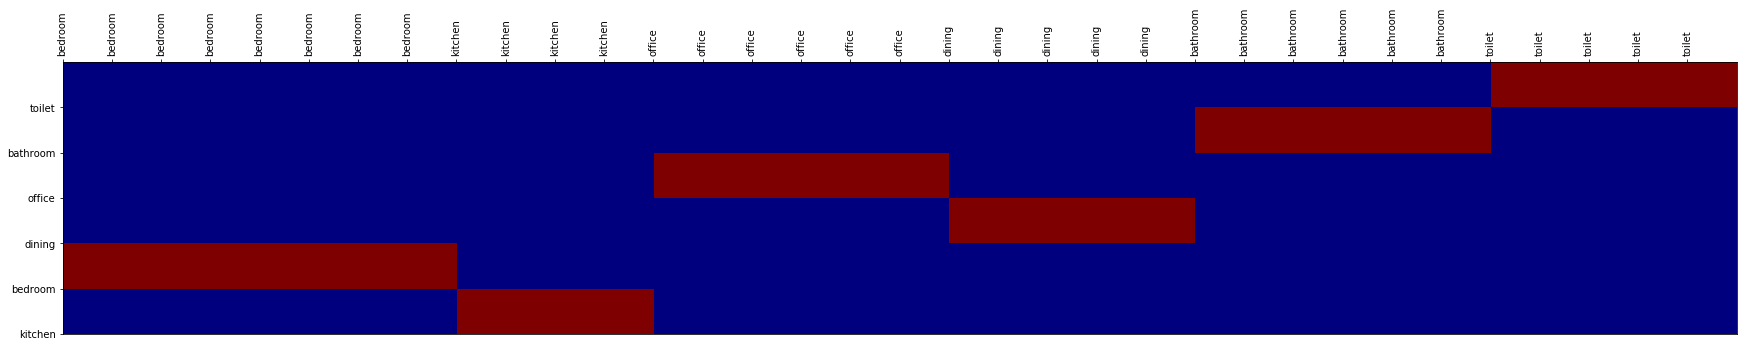

In [3993]:
plt.figure(figsize=(30,5))
plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
plt.yticks(range(len(places)),list(places)[::-1], rotation='horizontal')
plt.imshow(place,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(labeled_features),0,len(places)], aspect='auto')

# (Test) save mfccs to calculate correlations

In [3994]:
session[0]

'2'

In [3995]:
count = 0
for loc in place_cluster:
    if loc == "bedroom":
        pd.DataFrame(mfcc_list[count]).T.to_csv(training_root + "mfccs/"  + loc + "_env" + str(experiment_number)+ "_" + session[0] + "_" +str(count), header=False, index=False)
        count = count + 1
    else: count = count + 1

# (Test) multivariate DTW with 12th degree MFCC 

In [3925]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from tqdm import tqdm


mult_dist_mat = []
std_mfcc_list = []

#standardize each impulse response mfcc coefficient-wise
for x1 in tqdm(mfcc_list):
    #print len(x1.T)
    f1 = []
    for c in range(len(x1.T)):
        std = np.std(x1.T)
        avg = np.mean(x1.T)
        m1 = (x1.T[c] - avg) / std
        f1.append(m1)
    std_mfcc_list.append(f1)

#Calculate distance matrix
for i1 in tqdm(mfcc_list):
    mult_dist = []
    for i2 in mfcc_list:
        distance, path = fastdtw(i1, i2, dist=euclidean)
        mult_dist.append(distance)
    mult_dist_mat.append(np.array(mult_dist))





  0%|          | 0/34 [00:00<?, ?it/s]



100%|██████████| 34/34 [00:00<00:00, 473.53it/s]



  0%|          | 0/34 [00:00<?, ?it/s]



  3%|▎         | 1/34 [00:00<00:29,  1.10it/s]



  6%|▌         | 2/34 [00:01<00:28,  1.11it/s]



  9%|▉         | 3/34 [00:02<00:28,  1.10it/s]



 12%|█▏        | 4/34 [00:03<00:26,  1.15it/s]



 15%|█▍        | 5/34 [00:04<00:29,  1.03s/it]



 18%|█▊        | 6/34 [00:05<00:28,  1.02s/it]



 21%|██        | 7/34 [00:06<00:26,  1.03it/s]



 24%|██▎       | 8/34 [00:07<00:25,  1.00it/s]



 26%|██▋       | 9/34 [00:08<00:24,  1.01it/s]



 29%|██▉       | 10/34 [00:09<00:24,  1.03s/it]



 32%|███▏      | 11/34 [00:10<00:22,  1.03it/s]



 35%|███▌      | 12/34 [00:11<00:20,  1.05it/s]



 38%|███▊      | 13/34 [00:12<00:19,  1.07it/s]



 41%|████      | 14/34 [00:13<00:18,  1.09it/s]



 44%|████▍     | 15/34 [00:14<00:17,  1.10it/s]



 47%|████▋     | 16/34 [00:15<00:16,  1.11it/s]



 50%|█████     | 17/34 [00:16<00:15,  1.12it/s]



 5

In [3545]:
mult_dist_mat = [l.tolist() for l in mult_dist_mat]

In [3546]:
mult_dist_mat

[[0.0,
  4176.049857515008,
  3980.721851405652,
  5284.620925778122,
  4785.8301067091015,
  3513.9676229016327,
  4297.279046149291,
  4043.256568007199,
  4109.870234861114,
  4871.1955421709135,
  3413.847287114859,
  5080.347382537165,
  4726.6651600679315,
  4364.262446988683,
  4650.550832417992,
  4148.23355585445,
  3915.1531265373387,
  4090.5441597803238,
  3751.9170212731783,
  5442.594350391142,
  5303.834256044548,
  4085.5954549263465,
  4668.230633417448,
  3974.1828609123586,
  3777.5837274390306,
  3567.453758346759,
  3918.4701055671962,
  4829.620616477932,
  4174.502929850212,
  4561.510338734394,
  4424.072130472143,
  4191.817102063463,
  4056.6342639831705,
  4113.743981237608,
  4349.105892299155,
  5157.052549208983,
  4066.8738374296004,
  4893.256221750468],
 [4176.049857515008,
  0.0,
  4734.961200606701,
  5191.595293964978,
  4432.273034623394,
  3855.2184162589474,
  4358.6583671582075,
  4445.95476219256,
  4686.438171474925,
  4864.557695140653,
  4300

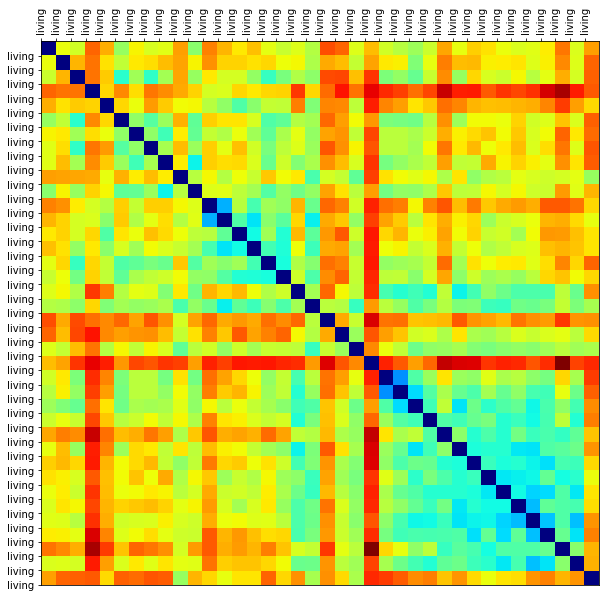

In [3547]:
plt.figure(figsize=(10,10))
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
plt.yticks(range(len(place_cluster)),place_cluster[::-1], rotation='horizontal')
plt.imshow(mult_dist_mat, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(mult_dist_mat),0,len(mult_dist_mat)], aspect='auto')
#plt.colorbar()

# Distance matrix claculation

In [3170]:
dist_mat = []
for ft1 in features.values:
    line = []
    for ft2 in features.values:
        line.append(np.linalg.norm(ft1-ft2))
        
    dist_mat.append(line)

In [3056]:
dist_mat

[[0.0,
  40.09262012676378,
  24.717489730518132,
  16.6372229158719,
  20.41612206640622,
  15.20005463280483,
  55.20533101793687,
  48.40938626179213,
  44.56579422515685,
  52.2912344346266,
  31.659493097451417,
  38.301222451601895,
  39.799426235633575,
  72.97649913272267,
  60.41111341403735,
  38.45810354709323,
  28.881932462830434,
  34.95937267941628,
  41.64935059349605,
  33.226799154275696,
  23.641777769609913,
  17.74787451979298,
  18.102475972825577,
  18.9374982513357,
  27.79095559885624,
  17.53502387722974,
  30.416678837788687,
  18.681090446123523,
  27.17908684002,
  38.708354275586736,
  24.197416321415293,
  30.108393783162647,
  44.60173697064733,
  15.395685286716027,
  12.56973783016013,
  13.184905196307545,
  16.394047380539,
  16.294326498102016,
  33.99301485513992],
 [40.09262012676378,
  0.0,
  43.3036601832914,
  35.80321544901428,
  36.867099908254644,
  41.93514312926698,
  65.39504567695012,
  62.17748736960779,
  65.87785319172279,
  56.912642

In [3057]:
place_cluster

['balcony',
 'balcony',
 'balcony',
 'balcony',
 'balcony',
 'balcony',
 'balcony',
 'balcony',
 'toilet',
 'toilet',
 'toilet',
 'toilet',
 'bathroom',
 'bathroom',
 'bathroom',
 'bathroom',
 'kitchen',
 'kitchen',
 'kitchen',
 'kitchen',
 'kitchen',
 'dining',
 'dining',
 'dining',
 'dining',
 'office',
 'office',
 'office',
 'office',
 'office',
 'office',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom']

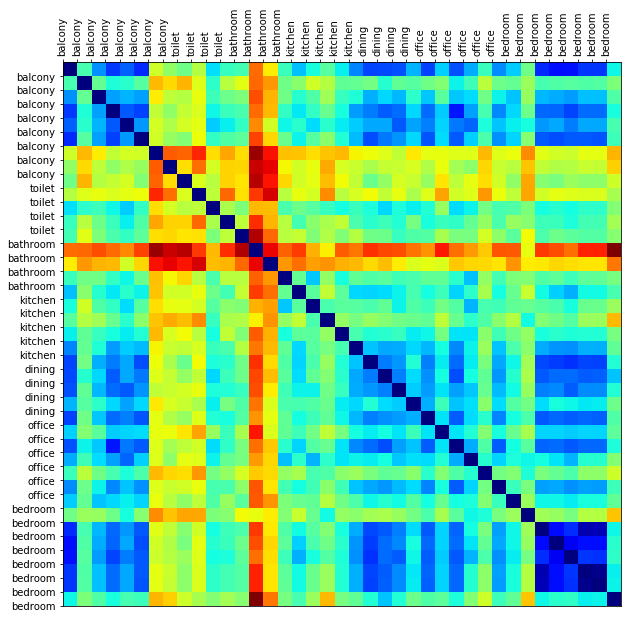

In [3058]:
plt.figure(figsize=(10,10))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
plt.yticks(range(len(place_cluster)),place_cluster[::-1], rotation='horizontal')
plt.imshow(dist_mat, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(dist_mat),0,len(dist_mat)], aspect='auto')


# Similarity matrix calculation (either use dist_mat = mult_dist _mat or not)

In [3066]:
dist_mat = mult_dist_mat

In [3067]:
max_dist = np.array(dist_mat).max()
similarity_matrix = []
for ln in dist_mat:
    sim = []
    for element in ln:
        simv=1.0-element/max_dist
        sim.append(simv if simv>0.8 else 0.0)
    similarity_matrix.append(sim)

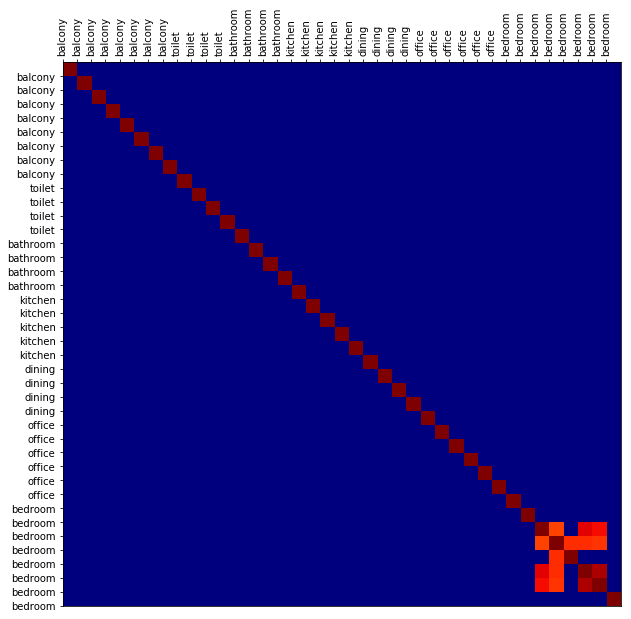

In [3068]:
plt.figure(figsize=(10,10))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
plt.yticks(range(len(place_cluster)),place_cluster[::-1], rotation='horizontal')
plt.imshow(similarity_matrix, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(similarity_matrix),0,len(similarity_matrix)], aspect='auto')

# Make all diagonal components = 0

In [3069]:
similarity_matrix = np.array(similarity_matrix)
np.fill_diagonal(similarity_matrix, 0)

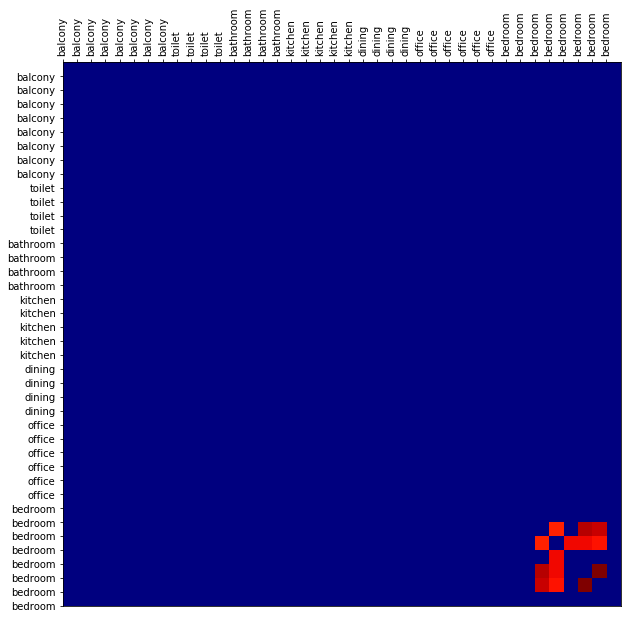

In [3070]:
plt.figure(figsize=(10,10))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
plt.yticks(range(len(place_cluster)),place_cluster[::-1], rotation='horizontal')
plt.imshow(similarity_matrix, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(similarity_matrix),0,len(similarity_matrix)], aspect='auto')

# Calculating the probability of each sweep feature appearing in each location

In [3071]:
prob = []
num = 0
for items in np.array(similarity_matrix):
    p = []
    denom_array = []
    
    for m in range(0,len(places)):
        #print np.sum(place[m])
        denom_array.append(np.multiply(place[m],items)/np.sum(place[m]))
        denom = np.sum(denom_array)
    for n in range(0,len(places)):
        if np.sum(np.multiply(items,np.asarray(place))) == 0.0:
            p.append(1.0/len(places))
            #print np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
        else:
            p.append((np.sum(np.multiply(place[n],items))/np.sum(place[n])) / denom)#np.sum([np.multiply(items,place[0])/np.sum(place[0]) , np.multiply(items,place[1])/np.sum(place[1]) , np.multiply(items,place[2])/np.sum(place[2])]))#/np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
    prob.append(p)

In [3072]:
places

{'balcony', 'bathroom', 'bedroom', 'dining', 'kitchen', 'office', 'toilet'}

In [3073]:
list(places)

['toilet', 'bathroom', 'office', 'dining', 'bedroom', 'balcony', 'kitchen']

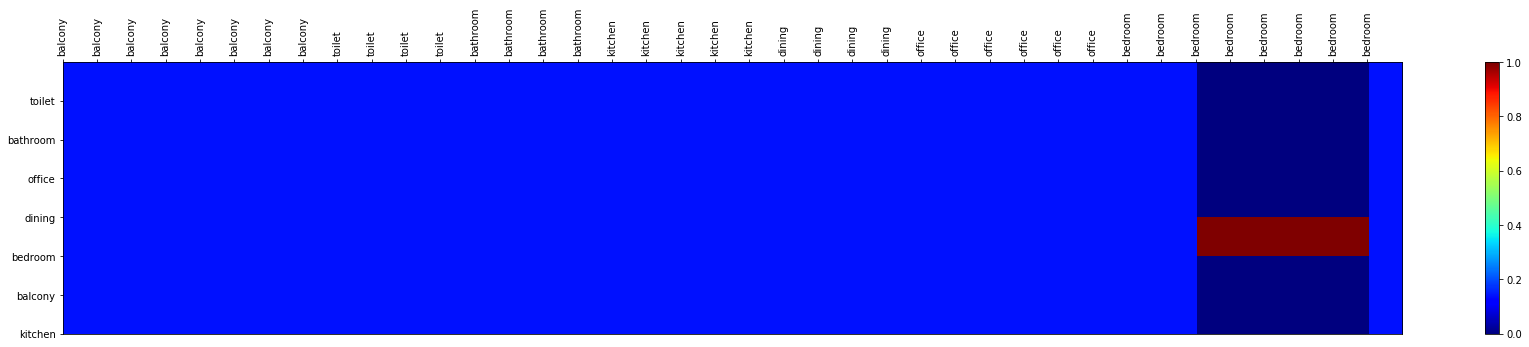

In [3074]:
plt.figure(figsize=(30,5))
plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
plt.yticks(range(len(places)),list(places)[::-1], rotation='horizontal')
plt.imshow(np.array(prob)[:len(similarity_matrix)].T,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(prob),0,len(place)], aspect='auto')
plt.colorbar()

# Calculating LSM

In [2932]:
prob_sum = []
for probs in prob:
    prob_sum.append(np.sum(np.power(probs,2)))

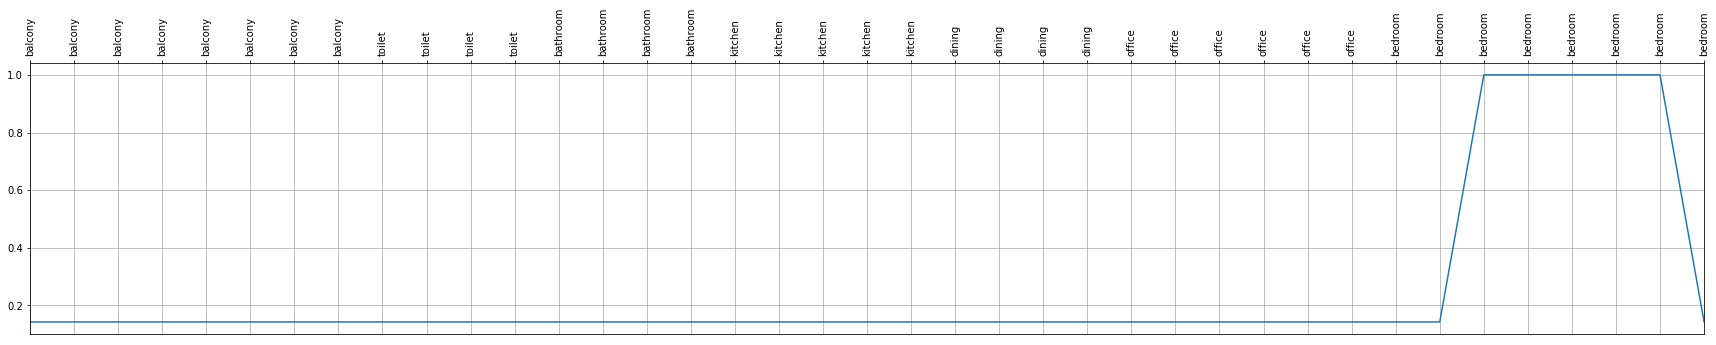

In [2933]:
plt.figure(figsize=(30,5))
plt.xticks(range(len(place_cluster)),place_cluster, rotation='vertical')
#plt.yticks(range(len(places)),list(places)[::-1], rotation='horizontal')
plt.xlim(0,len(prob_sum)-1)
plt.grid(True)
plt.plot(prob_sum)

# Calculate statistical features

In [1745]:
import itertools
def stat_feat_calc(feat):
    stat_feat = []
    feat = pd.DataFrame(feat)
    #display(feat.head())
    #print feat.mean()
    #print feat.std()
    #print feat.mode()
    stat_feat = list(itertools.chain(feat.mean(),feat.std(),feat.min(),feat.max()))
    
    return pd.DataFrame(stat_feat).T

In [1746]:
count = 0
motifs = []
mfcc_stat_feat = pd.DataFrame()
lab = []
print len(prob_sum)
for coef in prob_sum:
    if coef>0.8:
        mfcc_stat_feat = pd.concat([mfcc_stat_feat,pd.DataFrame(stat_feat_calc(mfcc_list[count]))], axis=0)
        print count
        print place_cluster[count]
        lab.append(place_cluster[count])
        count=count + 1
    if coef<0.2:
        mfcc_stat_feat = pd.concat([mfcc_stat_feat,pd.DataFrame(stat_feat_calc(mfcc_list[count]))], axis=0)
        print count
        print place_cluster[count]
        lab.append("other")
        count=count + 1
    #else: count = count+1
        

32
0
bedroom
1
bedroom
2
bedroom
3
bedroom
4
bedroom
5
bedroom
6
bathroom
7
bathroom
8
bathroom
9
bathroom
10
bathroom
11
bathroom
12
toilet
13
toilet
14
toilet
15
toilet
16
toilet
17
kitchen
18
kitchen
19
kitchen
20
kitchen
21
office
22
office
23
office
24
office
25
office
26
office
27
dining
28
dining
29
dining
30
dining
31
dining


In [1747]:
mfcc_stat_feat.index = lab

In [1748]:
place_cluster

['bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bedroom',
 'bathroom',
 'bathroom',
 'bathroom',
 'bathroom',
 'bathroom',
 'bathroom',
 'toilet',
 'toilet',
 'toilet',
 'toilet',
 'toilet',
 'kitchen',
 'kitchen',
 'kitchen',
 'kitchen',
 'office',
 'office',
 'office',
 'office',
 'office',
 'office',
 'dining',
 'dining',
 'dining',
 'dining',
 'dining']

In [1749]:
mfcc_stat_feat

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
other,-9.999989e-09,-9.999987e-09,-9.999974e-09,-9.999964e-09,-9.999993e-09,-1.000003e-08,-1.000001e-08,-1.000001e-08,-1.000000e-08,-1.000001e-08,...,139.703484,216.143006,147.169301,116.986568,120.145641,135.910842,64.950009,61.348255,73.177584,100.207434
bedroom,-9.999981e-09,-1.000000e-08,-1.000000e-08,-1.000005e-08,-1.000000e-08,-1.000001e-08,-9.999987e-09,-1.000001e-08,-1.000000e-08,-9.999989e-09,...,83.932443,39.471268,52.399224,124.311889,117.297112,80.588649,32.046011,61.149687,104.692411,97.057984
bedroom,-9.999985e-09,-1.000001e-08,-1.000002e-08,-1.000001e-08,-9.999998e-09,-9.999994e-09,-9.999996e-09,-9.999986e-09,-9.999997e-09,-1.000000e-08,...,82.359278,40.561468,71.533517,147.911287,128.653506,54.474374,46.899375,93.528752,73.407616,93.639822
bedroom,-9.999999e-09,-1.000000e-08,-1.000001e-08,-9.999932e-09,-1.000000e-08,-1.000001e-08,-1.000001e-08,-9.999985e-09,-1.000000e-08,-1.000000e-08,...,90.493026,42.327024,78.389025,166.392190,140.737173,48.943210,56.980526,122.853953,67.266374,96.593901
other,-9.999994e-09,-9.999991e-09,-9.999979e-09,-1.000001e-08,-1.000001e-08,-9.999998e-09,-1.000001e-08,-9.999998e-09,-1.000001e-08,-1.000002e-08,...,105.751689,61.834219,97.752487,131.122699,147.845855,91.429968,111.485917,64.985190,94.805650,85.913793
other,-1.000000e-08,-9.999984e-09,-1.000001e-08,-9.999985e-09,-1.000000e-08,-9.999989e-09,-9.999990e-09,-1.000000e-08,-9.999992e-09,-9.999999e-09,...,80.241709,64.243495,162.307343,97.311590,130.292574,126.811806,28.612932,30.615536,84.513985,44.481749
other,-9.999987e-09,-1.000001e-08,-1.000000e-08,-1.000002e-08,-1.000000e-08,-9.999989e-09,-9.999998e-09,-9.999975e-09,-9.999995e-09,-9.999987e-09,...,195.177119,144.372050,134.989675,189.579414,97.133216,51.783826,135.524383,132.545998,56.256650,60.364188
other,-9.999990e-09,-9.999989e-09,-1.000000e-08,-9.999950e-09,-1.000002e-08,-9.999997e-09,-9.999995e-09,-1.000000e-08,-1.000000e-08,-9.999988e-09,...,182.445590,211.575723,73.264905,210.253882,103.456762,153.890774,145.445955,151.893937,115.861226,90.538890
other,-9.999998e-09,-1.000000e-08,-1.000001e-08,-1.000003e-08,-9.999999e-09,-1.000001e-08,-9.999990e-09,-1.000001e-08,-1.000000e-08,-9.999994e-09,...,196.078418,187.563800,155.168735,169.750820,113.235279,117.351108,102.322576,109.991959,98.188478,79.865307
other,-9.999999e-09,-9.999999e-09,-1.000003e-08,-9.999977e-09,-1.000000e-08,-9.999994e-09,-9.999976e-09,-9.999995e-09,-1.000001e-08,-9.999991e-09,...,115.585328,90.372884,61.441461,94.945062,49.309099,103.933011,93.371694,42.688511,26.156122,34.794202


In [1750]:
mfcc_stat_feat.to_csv(root + "/training_phase/" + "all_mots2", header=False)

In [1751]:
root

'processed/experiment_1/5'

# Remove after this

# MFCC

mfcc,mag_frames,pow_frames=calc_mfcc(sample_rate,cut[58])

plot_mfcc_data(mfcc,mfcc.min()/2,mfcc.max()/2,"mfcc")
#plt.savefig("audio.png")

print mfcc.T.mean(axis=0).shape
plt.figure(figsize = (20,5))
plt.xlim(0,len(mfcc)-1)
plt.plot(mfcc.T.mean(axis=0))
#plt.savefig(visual_path + material + "mfcc_avg.png")

# Magnitude

#plot_mfcc_data(mag_frames,mag_frames.min()/10000,mag_frames.max()/100)

#plot_mfcc_data(pow_frames,pow_frames.min()/1000000,pow_frames.max()/100)

# DMFCC

import librosa
dmfcc = librosa.feature.delta(mfcc,order=1)

plot_mfcc_data(dmfcc,dmfcc.min(),dmfcc.max(),"dmfcc")

len(dmfcc.T)

print dmfcc.T.mean(axis=0).shape
plt.figure(figsize = (20,5))
plt.xlim(0,len(dmfcc)-1)
plt.plot(dmfcc.mean(axis=1))
#plt.savefig(visual_path + material + "dmfcc_avg")

# DDMFCC

ddmfcc = librosa.feature.delta(mfcc,order=2)

plot_mfcc_data(ddmfcc,ddmfcc.min(),ddmfcc.max(),"ddmfcc")

print ddmfcc.T.mean(axis=0).shape
plt.figure(figsize = (20,5))
plt.xlim(0,len(ddmfcc)-1)
plt.plot(ddmfcc.T.mean(axis=0))
#plt.savefig(visual_path + material + "ddmfcc_avg")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

def tsne(feat):
    #selected_feat = pd.concat([feat.loc[feat.index=="bath_mfcc"],feat.loc[feat.index=="kit_mfcc"], feat.loc[feat.index=="bed_mfcc"]])
    #selected_feat.dropna(axis=1, inplace=True)
    #display(selected_feat)
    
    
    tsne = TSNE(n_components=1, random_state=150)
    X_2d = tsne.fit_transform(feat)

    plt.figure(figsize = (20,5))
    plt.xlim(0,len(X_2d)-1)
    plt.plot(X_2d)

tsne(mfcc)

print mfcc.mean(axis=1).shape
print dmfcc.mean(axis=1).shape
print ddmfcc.mean(axis=1).shape

feature = pd.DataFrame(columns=['mfcc','dmfcc','ddmfcc'])
feature['mfcc'] = pd.Series(mfcc.mean(axis=1))
feature['dmfcc'] = pd.Series(dmfcc.mean(axis=1))
feature['ddmfcc'] = pd.Series(ddmfcc.mean(axis=1))
#feature(mfcc.mean(axis=1),dmfcc.mean(axis=1))#,ddmfcc.mean(axis=1))

unprocessed_features = pd.concat([pd.DataFrame(mfcc),pd.DataFrame(dmfcc),pd.DataFrame(ddmfcc)], axis=1)

feature.to_csv(vector_path+str(session_starttime)+"-"+str(session_endtime)+".csv",index=False,header=False)

unprocessed_features.to_csv(vector_path+ "unprocessed/" +str(session_starttime)+"-"+str(session_endtime)+".csv",index=False,header=False)

# Memory stack

stack = librosa.feature.stack_memory(conv[0])

plot_mfcc_data(stack,stack.min()/100000,stack.max()/100000,"stack")

# Melspectrogram

melspectrogram = librosa.feature.melspectrogram(y=conv[0],sr=sample_rate)

plot_mfcc_data(melspectrogram.T,10000000,0,"mel")

melspectrogram.shape

# Root mean square energy

rms = librosa.feature.rmse(y=conv[0])

plot_mfcc_data(rms, rms.max(), rms.min(),"RMSE")

rms

plt.plot(rms.reshape(-1))

S, phase = librosa.magphase(librosa.stft(conv[0]))

import librosa.display

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

plt.figure(figsize = (20,5))
plt.plot(conv[0][conv[0].argmax()-1000:conv[0].argmax()+1000])
plt.savefig("wave.png")
plt.show()

#mfcc=calc_mfcc(sample_rate,sync_avg)

pd.concat(a,pd.DataFrame(ddmfcc.mean(axis=1)))

a = np.concatenate((mfcc.mean(axis=1),dmfcc.mean(axis=1)),axis=1)#,ddmfcc.mean(axis=1)).T,axis=1)

numpy.savetxt("foo.csv", a, delimiter=",")

for num in range(0,len(sync_add)):
    print len(sync_add[num])

cut[1][2000-1500-int(max_cor_pos[0][0]):2000-1500-int(max_cor_pos[0][0])+1]

cut[0][0:1]

for y in range(0,2000-(500-int(max_cor_pos[0][0]))):
    
    print float(cut[0][y:y+1])+int(cut[1][2000-1500-int(max_cor_pos[0][0])+y:2000-1500-int(max_cor_pos[0][0])+y+1])
    print "y=",y

max_cor_pos

correlation = []
for i in range(0,500):
    r,p = pearsonr(cut1[0:1500+i],cut2[500-i:2000])
    correlation.append(r)

np.nanmax(np.asarray(correlation))

np.where(correlation==np.nanmax(np.asarray(correlation)))

correlation[493]

from scipy.stats import pearsonr
for i in range(0:len(conv[1][conv[1].argmax()-1000:conv[1].argmax()+1000])):
    r,p = pearsonr(conv[0][conv[0].argmax()-1000:conv[0].argmax()+1000],conv[1][conv[1].argmax()-1000:conv[1].argmax()+1000])

r

for test in range(0,len(conv)):
    print len(conv[test])